In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nbodykit.lab as nb
import fitsio as ft
import numpy as np

In [6]:
plt.rc('font', size=20)

In [10]:
!ls /home/mehdi/data/eboss/v7_1/0.4

eBOSS_QSO_full_NGC_v7_1.dat.fits
eBOSS_QSO_full_NGC_v7_1.ran.fits
eBOSS_QSO_full_NGC_v7_1_wnnz_ablation.dat.fits
eBOSS_QSO_full_NGC_v7_1_wnnz_ablation.ran.fits
eBOSS_QSO_full_NGC_v7_1_wnnz_known.dat.fits
eBOSS_QSO_full_NGC_v7_1_wnnz_known.ran.fits
eBOSS_QSO_full_NGC_v7_1_wnnz_plain.dat.fits
eBOSS_QSO_full_NGC_v7_1_wnnz_plain.ran.fits
eBOSS_QSO_full_SGC_v7_1.dat.fits
eBOSS_QSO_full_SGC_v7_1.ran.fits
frac_NGC_0.8_512.hp.fits
frac_NGC_1.1_512.hp.fits
frac_NGC_1.4_512.hp.fits
frac_NGC_1.6_512.hp.fits
frac_NGC_1.9_512.hp.fits
galmap_NGC_0.8_512.hp.fits
galmap_NGC_1.1_512.hp.fits
galmap_NGC_1.4_512.hp.fits
galmap_NGC_1.6_512.hp.fits
galmap_NGC_1.9_512.hp.fits
mask_NGC_0.8_512.hp.fits
mask_NGC_1.1_512.hp.fits
mask_NGC_1.4_512.hp.fits
mask_NGC_1.6_512.hp.fits
mask_NGC_1.9_512.hp.fits
ngal_features_NGC_0.8_512.5r.npy
ngal_features_NGC_0.8_512.fits
ngal_features_NGC_1.1_512.5r.npy
ngal_features_NGC_1.1_512.fits
ngal_features_NGC_1.4_512.5r.npy
ngal_features_NGC_1.4_512.fits
ngal_features_NGC_1.6

In [4]:
ls /home/mehdi/data/eboss/v7_1/0.5/pk*

/home/mehdi/data/eboss/v7_1/0.5/pk_NGC_v7_1_512.json
/home/mehdi/data/eboss/v7_1/0.5/pk_NGC_v7_1_nosysweight_512.json
/home/mehdi/data/eboss/v7_1/0.5/pk_NGC_v7_1_wnnz_ablation_512.json
/home/mehdi/data/eboss/v7_1/0.5/pk_NGC_v7_1_wnnz_known_512.json
/home/mehdi/data/eboss/v7_1/0.5/pk_NGC_v7_1_wnnz_plain_512.json


In [4]:
!ls /home/mehdi/data/eboss/v7_1/0.6/pk*

/home/mehdi/data/eboss/v7_1/0.6/pk_NGC_v7_1_512.json
/home/mehdi/data/eboss/v7_1/0.6/pk_NGC_v7_1_nosysweight_512.json
/home/mehdi/data/eboss/v7_1/0.6/pk_NGC_v7_1_wnnzlowhigh_ablation_512.json
/home/mehdi/data/eboss/v7_1/0.6/pk_NGC_v7_1_wnnzlowhigh_known_512.json
/home/mehdi/data/eboss/v7_1/0.6/pk_NGC_v7_1_wnnzlowhigh_plain_512.json


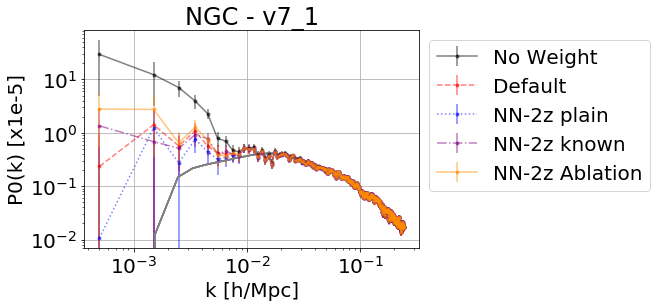

In [7]:
path  = '/home/mehdi/data/eboss/v7_1/0.6/'
pkout = lambda hemi, branch : 'pk_'+hemi+'_'+branch+'_512.json'

hemi  = 'NGC'
ttl   = ['No Weight', 'Default', 'NN-2z plain', 'NN-2z known', 'NN-2z Ablation']
mk    = ['.', '.', '.', '.', '.']
c     = ['k', 'r', 'b', 'purple', 'darkorange']
ls    = 2*['-', '--', ':', '-.']

for i,branch in enumerate(['v7_1_nosysweight', 'v7_1', 'v7_1_wnnzlowhigh_plain','v7_1_wnnzlowhigh_known', 'v7_1_wnnzlowhigh_ablation']):
    pk_i = nb.ConvolvedFFTPower.load(path + pkout(hemi, branch))
    err = 1.e-5*pk_i.poles['power_0'].real/(0.5*pk_i.poles['modes'])**0.5
    plt.errorbar(pk_i.poles.coords['k'], 1.e-5*(pk_i.poles['power_0'].real-pk_i.attrs['shotnoise']),
                yerr=err,label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.5)
    Pkmock = np.loadtxt('/home/mehdi/data/eboss/v5/Power_Spectrum_DR16QSO_'+hemi+'_av.txt', usecols=(0, 1))
    plt.plot(Pkmock[:, 0], 1.e-5*Pkmock[:, 1], c='grey')

# plt.ylim(-0.5, 2.)    
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.,1.))
plt.xscale('log')
plt.ylabel('P0(k) [x1e-5]')
plt.title('NGC - v7_1')
plt.xlabel('k [h/Mpc]')
plt.grid()
plt.savefig('kpkv7_1_2z.png', dpi=300, bbox_inches='tight')

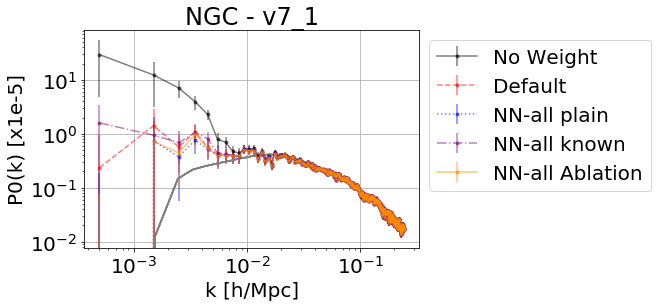

In [6]:
path  = '/home/mehdi/data/eboss/v7_1/0.5/'
pkout = lambda hemi, branch : 'pk_'+hemi+'_'+branch+'_512.json'

hemi  = 'NGC'
ttl   = ['No Weight', 'Default', 'NN-all plain', 'NN-all known', 'NN-all Ablation']
mk    = ['.', '.', '.', '.', '.']
c     = ['k', 'r', 'b', 'purple', 'darkorange']
ls    = 2*['-', '--', ':', '-.']

for i,branch in enumerate(['v7_1_nosysweight', 'v7_1', 'v7_1_wnnz_plain','v7_1_wnnz_known', 'v7_1_wnnz_ablation']):
    pk_i = nb.ConvolvedFFTPower.load(path + pkout(hemi, branch))
    err = 1.e-5*pk_i.poles['power_0'].real/(0.5*pk_i.poles['modes'])**0.5
    plt.errorbar(pk_i.poles.coords['k'], 1.e-5*(pk_i.poles['power_0'].real-pk_i.attrs['shotnoise']),
                yerr=err,label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.5)
    Pkmock = np.loadtxt('/home/mehdi/data/eboss/v5/Power_Spectrum_DR16QSO_'+hemi+'_av.txt', usecols=(0, 1))
    plt.plot(Pkmock[:, 0], 1.e-5*Pkmock[:, 1], c='grey')

# plt.ylim(-0.5, 2.)    
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.,1.))
plt.xscale('log')
plt.ylabel('P0(k) [x1e-5]')
plt.title('NGC - v7_1')
plt.xlabel('k [h/Mpc]')
plt.grid()
plt.savefig('kpkv7_1.png', dpi=300, bbox_inches='tight')

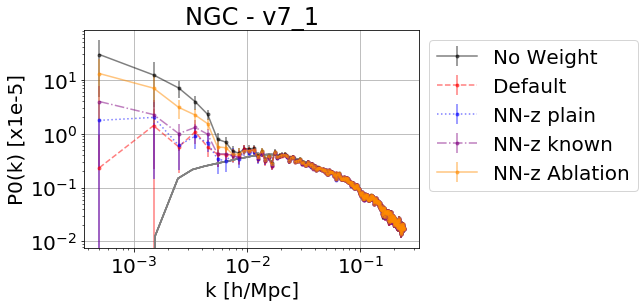

In [12]:
path  = '/home/mehdi/data/eboss/v7_1/0.4/'
pkout = lambda hemi, branch : 'pk_'+hemi+'_'+branch+'_512.json'

hemi  = 'NGC'
ttl   = ['No Weight', 'Default', 'NN-z plain', 'NN-z known', 'NN-z Ablation']
mk    = ['.', '.', '.', '.', '.']
c     = ['k', 'r', 'b', 'purple', 'darkorange']
ls    = 2*['-', '--', ':', '-.']

for i,branch in enumerate(['v7_1_nosysweight', 'v7_1', 'v7_1_wnnz_plain','v7_1_wnnz_known', 'v7_1_wnnz_ablation']):
    pk_i = nb.ConvolvedFFTPower.load(path + pkout(hemi, branch))
    err = 1.e-5*pk_i.poles['power_0'].real/(0.5*pk_i.poles['modes'])**0.5
    plt.errorbar(pk_i.poles.coords['k'], 1.e-5*(pk_i.poles['power_0'].real-pk_i.attrs['shotnoise']),
                yerr=err,label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.5)
    Pkmock = np.loadtxt('/home/mehdi/data/eboss/v5/Power_Spectrum_DR16QSO_'+hemi+'_av.txt', usecols=(0, 1))
    plt.plot(Pkmock[:, 0], 1.e-5*Pkmock[:, 1], c='grey')

# plt.ylim(-0.5, 2.)    
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.,1.))
plt.xscale('log')
plt.ylabel('P0(k) [x1e-5]')
plt.title('NGC - v7_1')
plt.xlabel('k [h/Mpc]')
plt.grid()
plt.savefig('kpkv7_1_zsplit.png', dpi=300, bbox_inches='tight')

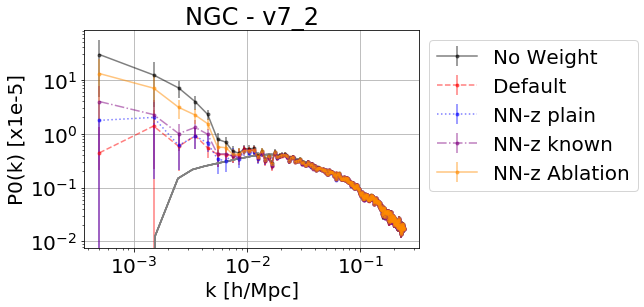

In [14]:
path  = '/home/mehdi/data/eboss/v7_2/v0.0/'
pkout = lambda hemi, branch : 'pk_'+hemi+'_'+branch+'_512.json'

hemi  = 'NGC'
ttl   = ['No Weight', 'Default', 'NN-z plain', 'NN-z known', 'NN-z Ablation']
mk    = ['.', '.', '.', '.', '.']
c     = ['k', 'r', 'b', 'purple', 'darkorange']
ls    = 2*['-', '--', ':', '-.']

for i,branch in enumerate(['v7_2_nosysweight', 'v7_2', 'v7_2_wnnz_plain','v7_2_wnnz_known', 'v7_2_wnnz_ablation']):
    pk_i = nb.ConvolvedFFTPower.load(path + pkout(hemi, branch))
    err = 1.e-5*pk_i.poles['power_0'].real/(0.5*pk_i.poles['modes'])**0.5
    plt.errorbar(pk_i.poles.coords['k'], 1.e-5*(pk_i.poles['power_0'].real-pk_i.attrs['shotnoise']),
                yerr=err,label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.5)
    Pkmock = np.loadtxt('/home/mehdi/data/eboss/v5/Power_Spectrum_DR16QSO_'+hemi+'_av.txt', usecols=(0, 1))
    plt.plot(Pkmock[:, 0], 1.e-5*Pkmock[:, 1], c='grey')

# plt.ylim(-0.5, 2.)    
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.,1.))
plt.xscale('log')
plt.ylabel('P0(k) [x1e-5]')
plt.title('NGC - v7_2')
plt.xlabel('k [h/Mpc]')
plt.grid()
plt.savefig('kpkv7_2.png', dpi=300, bbox_inches='tight')

In [ ]:
ls /home/mehdi/data/eboss/v7_1/results_NGC/pk_NGC_systot_512.json

In [8]:
path = '/home/mehdi/data/eboss/'
def read(file):
    global path
    kpk = nb.ConvolvedFFTPower.load(file)
    err = kpk.poles['power_0'].real/(0.5*kpk.poles['modes'])**0.5
    return kpk.poles.coords['k'], kpk.poles['power_0'].real-kpk.attrs['shotnoise'], err

w71 = read('/home/mehdi/data/eboss/v7_1/0.4/pk_NGC_v7_1_512.json')
w72 = read('/home/mehdi/data/eboss/v7_2/v0.0/pk_NGC_v7_2_512.json')

w71n = read('/home/mehdi/data/eboss/v7_1/0.4/pk_NGC_v7_1_wnnz_plain_512.json')
w72n = read('/home/mehdi/data/eboss/v7_2/v0.0/pk_NGC_v7_2_wnnz_plain_512.json')

Text(0, 0.5, '[$P_{v7_{2}}-P_{v7_{1}}$]/$\\sigma P_{v7_{1}}$')

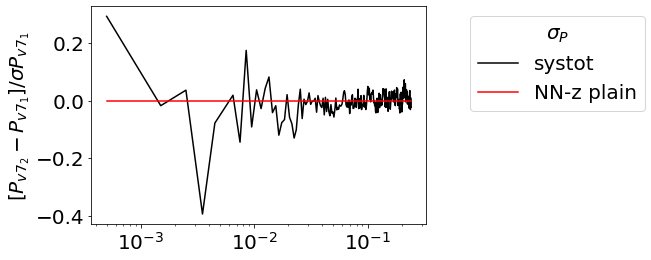

In [11]:
plt.plot(w71[0],  (w72[1]-w71[1])/w71[2],'k',
         w71n[0],  (w72n[1]-w71n[1])/w71n[2],'r')
         #w71[0], (wnnzp[1]-wnnzp6[1])/w71[2], 'r')
plt.legend(['systot', 'NN-z plain'],
          bbox_to_anchor=(1.1, 1.),
          title=r'$\sigma_{P}$')
plt.xscale('log')
plt.ylabel(r'[$P_{v7_{2}}-P_{v7_{1}}$]/$\sigma P_{v7_{1}}$')

In [15]:
w71n[1], w72n[1]

(array([177097.81  , 200700.62  ,  60733.266 ,  90066.99  ,  67525.28  ,
         33957.727 ,  31184.828 ,  42166.742 ,  33559.15  ,  48285.406 ,
         44360.914 ,  45050.96  ,  33515.67  ,  43944.586 ,  31974.734 ,
         37046.875 ,  26113.781 ,  43823.33  ,  36179.523 ,  38183.797 ,
         39448.86  ,  40352.17  ,  37049.14  ,  30597.508 ,  35220.938 ,
         37036.547 ,  30086.844 ,  31161.797 ,  31325.617 ,  32764.555 ,
         27822.172 ,  28720.406 ,  26418.117 ,  25987.758 ,  29734.305 ,
         26601.36  ,  24468.656 ,  27304.266 ,  22661.766 ,  24747.727 ,
         21344.477 ,  21695.25  ,  23068.203 ,  23050.82  ,  22409.703 ,
         21526.852 ,  21751.219 ,  21249.477 ,  19582.594 ,  21080.602 ,
         17937.375 ,  17891.383 ,  21020.453 ,  19252.344 ,  19079.86  ,
         18968.922 ,  19715.273 ,  18569.648 ,  16184.617 ,  17305.93  ,
         18242.32  ,  14113.18  ,  16304.523 ,  18009.227 ,  18157.367 ,
         16159.156 ,  16049.711 ,  14224.227 ,  144

Text(0.5, 1.0, 'NGC')

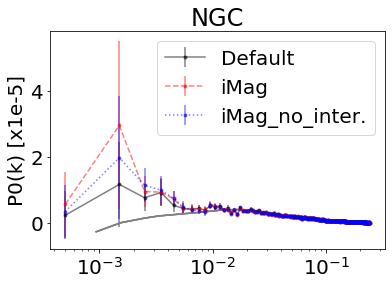

In [3]:
path  = '/home/mehdi/data/eboss/v7_1/results_NGC/'
pkout = lambda hemi, branch : 'pk_'+hemi+'_'+branch+'_512.json'

hemi  = 'NGC'
ttl   = ['Default', 'iMag', 'iMag_no_inter.']
mk    = ['.', '.', '.']
c = ['k', 'r', 'b']
ls = ['-', '--', ':']
for i,branch in enumerate(['systot', 'systot0.1', 'systot0.2']):
    pk_i = nb.ConvolvedFFTPower.load(path + pkout(hemi, branch))
    err = 1.e-5*pk_i.poles['power_0'].real/(0.5*pk_i.poles['modes'])**0.5
    plt.errorbar(pk_i.poles.coords['k'], 1.e-5*(pk_i.poles['power_0'].real-pk_i.attrs['shotnoise']),
                yerr=err,label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.5)
    Pkmock = np.loadtxt('/home/mehdi/data/eboss/v5/Power_Spectrum_DR16QSO_'+hemi+'_av.txt', usecols=(0, 1))
    plt.plot(Pkmock[:, 0], 1.e-5*Pkmock[:, 1], c='grey')

#plt.ylim(-0.5, 2.)    
plt.legend()
plt.xscale('log')
plt.ylabel('P0(k) [x1e-5]')
plt.title('NGC')

In [1]:
2*3

6